# Ensemble (Voting)

In [1]:
from src.si.data.dataset import Dataset, summary
from src.si.util.cv import CrossValidationScore
import os

In [2]:

DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/breast-bin.data')
dataset = Dataset.from_data(filename)
summary(dataset)


,A,B,C,D,E,F,G,H,I,Y
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
var,7.917053,9.298082,8.819630,8.141527,4.896110,13.099601,5.937114,9.311340,2.937284,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [3]:
dataset.toDataframe()

,A,B,C,D,E,F,G,H,I,Y
0,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,1.0
1,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
2,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
4,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0
695,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
696,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
697,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0


In [4]:
# Use accuracy as scorring function
from src.si.util.util import accuracy_score

# Decision Tree

In [5]:
from src.si.supervised.dt import DecisionTree

In [6]:
dt =  DecisionTree()

In [7]:
cv = CrossValidationScore(dt,dataset,score=accuracy_score)
cv.run()
cv.to_dataframe()

,Train Sores,Test scores
0,0.957066,0.914286
1,0.949911,0.950000
2,0.958855,0.921429


# Logistic Regression

In [8]:
from src.si.supervised.logistic_regression import LogisticRegression
logreg = LogisticRegression()

In [9]:
cv = CrossValidationScore(logreg,dataset,score=accuracy_score)
cv.run()
cv.to_dataframe()

,Train Sores,Test scores
0,0.957066,0.992857
1,0.964222,0.971429
2,0.966011,0.971429


# KNN

In [10]:
from src.si.supervised.KNN import KNN

In [11]:
knn = KNN(7)

In [12]:
cv = CrossValidationScore(knn,dataset,score=accuracy_score)
cv.run()
cv.to_dataframe()

,Train Sores,Test scores
0,0.976744,0.971429
1,0.978533,0.964286
2,0.973166,0.978571


In [13]:
def fvote(preds):
    return max(set(preds), key=preds.count)

# Ensemble

In [14]:
from src.si.supervised.ensemble import Ensemble, fvote
en = Ensemble([dt,logreg,knn],fvote ,accuracy_score)

In [15]:
cv = CrossValidationScore(en,dataset,score=accuracy_score)
cv.run()
cv.to_dataframe()

,Train Sores,Test scores
0,0.978533,0.942857
1,0.971377,0.978571
2,0.973166,0.971429


# Confusion Matrix

In [16]:
from src.si.util.confmatrix import ConfusionMatrix

In [17]:
pred = cv.pred_y
true = cv.true_y

In [18]:
cm = ConfusionMatrix()
cm(true, pred)

Predicted Values,0,1,All
Actual Values,,,
0.0,266,4,270
1.0,11,139,150
All,277,143,420


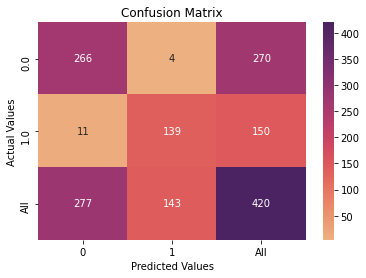

Predicted Values,0,1,All
Actual Values,,,
0.0,266,4,270
1.0,11,139,150
All,277,143,420


In [19]:
cm(true, pred, graph=True)